<h2>Metropolis Hastings Method</h2>

1) implement a Metropolis-Hastings algorithm to draw samples from the "Batman" target distribution.

2) Use a normal distribution centered on the current state, x, with a standard deviation of 2 as your
proposal distribution: $g(y | x) = N(y | x, 2 )$

3) Plot the distribution over states from this simulation.

● Run the simulation for at least 100,000 steps.

● Take every 100th step from your states, so $x_{100}, x_{200}, x_{300}, …,$ and plot a histogram of these
values over true distribution, $f(x).$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

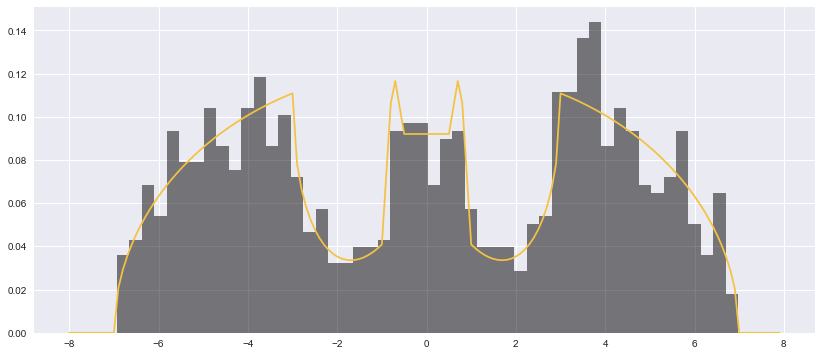

In [41]:
#batman plot
def f(x):
    Z = 24.44321494051954
    if abs(x) > 7:
        return 0
    elif abs(x) > 3:
        return 3 * (1 - (x / 7) ** 2) ** 0.5 / Z
    elif abs(x) > 1:
        return ((3 - abs(x)) / 2 - 3/7 * 10**0.5 * ((3 - x**2 + 2*abs(x))**0.5 - 2)) / Z
    elif abs(x) > 0.75:
        return (9 - 8 * abs(x)) / Z
    elif abs(x) > 0.5:
        return (3 * abs(x) + 0.75) / Z
    else:
        return 2.25 / Z
    
current_state = 0
samples = []

for i in range(100000):
    
    #sample from proposal distribution
    new_state = np.random.normal(current_state,2)
    
    #accept proposed state according to probability min(1, new_density/previous_density)
    if np.random.uniform()< min (1, f(new_state) / f(current_state)):
        current_state = new_state
        
    samples.append(current_state)
    
x = np.arange(-8,8,0.1)
y = [f(i) for i in x]

plt.figure(figsize=(14,6))
true_plot = plt.plot(x,y, color='#f4c242')
proposal_plot = plt.hist(samples[::100], density=True, bins=50, color='black', alpha=0.5)